# License Plate Detection

## Building Object Detector

1. [Install PyTorch](https://pytorch.org/get-started/locally/).

2. Install other dependencies.  
`pip install -r requirements.txt`

2. Clone YOLOv5 repo in root folder.  
`git clone https://github.com/ultralytics/yolov5`

3. Download dataset.  
Dataset used: [Kaggle Car License Plate Detection](https://www.kaggle.com/datasets/andrewmvd/car-plate-detection).

4. Prepare dataset according to [instructions provided by YOLOv5](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data).  
The **xmltotxt()** function provided in the next cell can be used to convert Kaggle annotations to YOLOv5 style labels.

5. Train the model.  
`cd yolov5`  
`python train.py --img 640 --batch 4 --epochs 500 --data dataset.yaml --weights yolov5m.pt --workers 2 --cache disk`  
Adjust arguments according to your pc and dataset.

6. Model with best performance will be stored in 'yolov5\runs\train\exp[x]\weights\best.pt'.  
Where [x] is the highest number present in the folder.

#### Converting XML annotations to text labels

In [2]:
import xmltodict
import glob
import os

def xmltotxt(input_folder: str, output_folder: str):
    """
    This function can be used to convert .xml files of
    Kaggle dataset to YOLOv5 style .txt labels.
    
    input_folder- Folder where all the .xml files are stored.
    output_folder- Folder where all converted .txt files are to be stored.
    """
    
    xmls = glob.glob(os.path.join(input_folder, "*.xml"))

    for xml in xmls:
        with open(xml, 'r') as f:
            data = f.read()
        data = xmltodict.parse(data)['annotation']

        box = []
        if isinstance(data['object'], list):
            for obj in data["object"]:
                box.append(obj['bndbox'])

        else: box.append(data['object']['bndbox'])

        imsize = data['size']

        output = ""
        for b in box:
            x_center = ((float(b['xmin'])+float(b['xmax']))/2) / float(imsize['width'])
            y_center = ((float(b['ymin'])+float(b['ymax']))/2) / float(imsize['height'])

            width = (float(b['xmax'])-float(b['xmin'])) / float(imsize['width'])
            height = (float(b['ymax'])-float(b['ymin'])) / float(imsize['height'])

            output += f"0 {x_center} {y_center} {width} {height}\n"

        output = output[:-1]

        filename = xml.split('\\')[-1][:-4] + ".txt"
        with open(os.path.join(output_folder, filename), 'w') as f:
            f.write(output)
            
xmltotxt("dataset\\whole\\annotations", "dataset\\whole\\labels")

## Testing Object Detector for License plates

In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

Using cache found in C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-27 Python-3.10.6 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
image 1/1: 640x640 1 LPlate
Speed: 0.0ms pre-process, 39.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


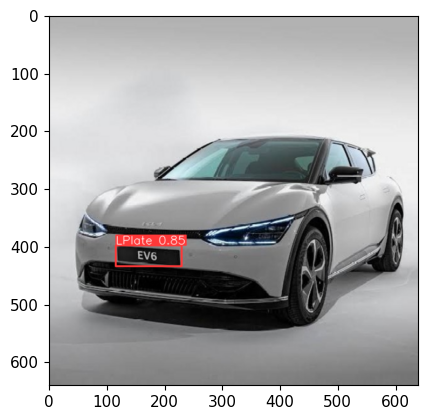

In [2]:
IMG_PATH = "dataset\\a.jpg"
MODEL_PATH = "plate_detector.pt"

model = torch.hub.load('ultralytics/yolov5', 'custom', path=MODEL_PATH, _verbose=False)

img = cv2.imread(IMG_PATH)
img = cv2.resize(img, (640,640))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

out = model(img)
out.print()

%matplotlib inline
plt.imshow(np.squeeze(out.render()))

In [7]:
# Save image
plt.imsave("dataset\\0.jpg", img)